In [1]:
#Climate Analysis and Exploration
#perform 3 analyses
#1. Precipitation analysis for the last 12 months of precipitation data for all weather stations
#2. Station analysis for the most active stations and the last 12 months of temperature observation data.
#3. Temperature analysis for the min, avg, and max temperature of a trip to Hawaii btw 3-15 days.

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [6]:
#Create the engine for the hawaii.sqlite db #I had to link the sqlite file to my desktop location otherwise I kept getting errors
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to measurement table as "Measurement"
Measurement = Base.classes.measurement
#Inspect columns
columns_m = inspector.get_columns('measurement')
for c in columns_m:
        print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Save references to station table as "Station"
Station = Base.classes.station
#Inspect columns
columns_s = inspector.get_columns('station')
for c in columns_s:
        print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
#Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [13]:
#Create a db session object
session = Session(engine)

In [36]:
#Find the last date of entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#Find the date 365 days from the last date
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)

#Locate the last 12 months of precipatation data
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()

In [37]:
#Add results to pandas df
precipitation_df = pd.DataFrame(one_yr_prcp, columns=['Date', 'Prcp'])

#Change the date to a df format
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format= '%Y/%m/%d')

#Changing index to the 'Date'
precipitation_df.set_index(precipitation_df['Date'], inplace=True)
precipitation_df.head()

,Date,Prcp
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,0.02


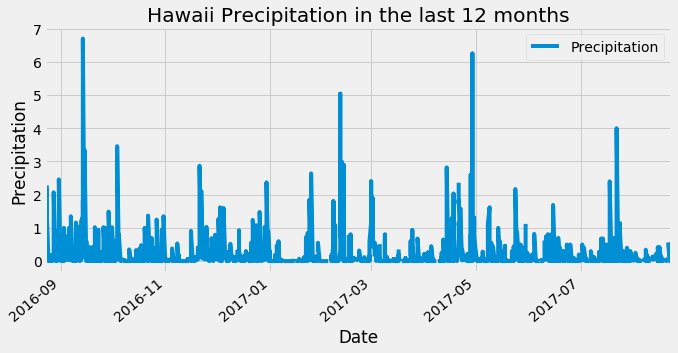

In [38]:
#Plot the results using the DataFrame plot method.
precipitation_df.plot('Date', 'Prcp', figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Hawaii Precipitation in the last 12 months")
plt.legend(["Precipitation"])
plt.xticks(rotation=40)
plt.show()

In [39]:
#2. Station Analysis
precipitation_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [40]:
#Find total number of stations on the "stations tab"
station_ct = session.query(Station.station).count()
print("There are {} stations".format(station_ct))

There are 9 stations


In [41]:
#List the most active station and observations in descending order.
station_tobs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                                                                group_by(Measurement.station).\
                                                                order_by(func.count(Measurement.tobs).desc()).all()
print("The most active stations with the most observations in descending order are:")
print()
for station, name, count in station_tobs:
                                        print("Stations:", station, "in", name, "with", count, "observations.")

The most active stations with the most observations in descending order are:

Stations: USC00519281 in WAIKIKI 717.2, HI US with 24948 observations.
Stations: USC00519397 in WAIKIKI 717.2, HI US with 24516 observations.
Stations: USC00513117 in WAIKIKI 717.2, HI US with 24381 observations.
Stations: USC00519523 in WAIKIKI 717.2, HI US with 24021 observations.
Stations: USC00516128 in WAIKIKI 717.2, HI US with 23508 observations.
Stations: USC00514830 in WAIKIKI 717.2, HI US with 19818 observations.
Stations: USC00511918 in WAIKIKI 717.2, HI US with 17811 observations.
Stations: USC00517948 in WAIKIKI 717.2, HI US with 12348 observations.
Stations: USC00518838 in WAIKIKI 717.2, HI US with 4599 observations.


In [42]:
#Most observations
max_station_ob = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                                                                  group_by(Measurement.station).\
                                                                  order_by(func.count(Measurement.tobs).desc()).first()
print("Station {}".format(max_station_ob[0], "in {}".format(max_station_ob[1])), "has the most observations, with {}".format(max_station_ob[2]))

Station USC00519281 has the most observations, with 24948


In [43]:
#Retreieve the last 12 months of temperature obseravtion data (tobs)
highest_obs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date>='2015-07-17').filter(Measurement.station == 'USC00519281').all()
obs_df = pd.DataFrame(highest_obs)
obs_df.head(12)

,station,tobs
0,USC00519281,75.0
1,USC00519281,83.0
2,USC00519281,72.0
3,USC00519281,71.0
4,USC00519281,73.0
5,USC00519281,76.0
6,USC00519281,74.0
7,USC00519281,75.0
8,USC00519281,78.0
9,USC00519281,72.0


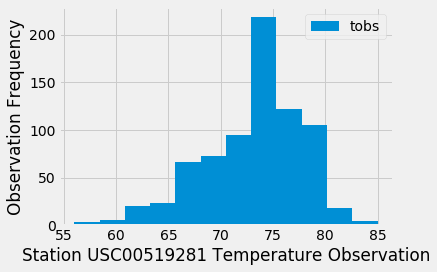

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

obs_df.plot.hist(bins=12)
plt.ylabel("Observation Frequency")
plt.xlabel("Station USC00519281 Temperature Observation")
plt.tight_layout()
plt.show()

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, # highest temperature recorded, and average temperature of the most active station?
temps = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()
print(f' For Station {temps[0][0]} the highest temp recorded was temp {[0][1]} degrees, the lowest temp recored was {temps[0][2]} degrees, and the average temp was {round(temps[0][3])}')


IndexError: list index out of range

![precipitation](Images/station-histogram.png)

In [46]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2016-07-01', '2016-07-14')
trip

[(71.0, 77.0919540229885, 82.0)]

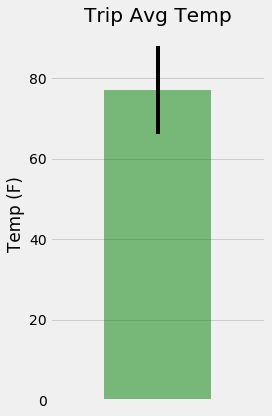

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temp_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])
trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax'] - trip_temp_df['tmin']), title='Trip Avg Temp', color='green', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()

In [49]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def precipitation(start_date, end_date):
    
    
    # """Precip information comes from the weather station.
    
    #Args:date (str): A date string in the format '%y-%m-%d'
        
    #Returns:A list of tuples containing the station name, latitude, longitude, and elevation, and precip amounts
    

    
    
    sel = [Measurement.station, 
          Station.name,
          Station.latitude,
          Station.longitude,
          Station.elevation,
          Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()
print(precipitation('2016-07-01', '2016-07-14'))

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, None), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, None)]


## Optional Challenge Assignment

In [50]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [51]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
